# Data Overview

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('T20WorldCupsResults.csv')


print(df.info())
print(df.head(), "\n")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         268 non-null    int64 
 1   Team 1       268 non-null    object
 2   Team 2       268 non-null    object
 3   Winner       259 non-null    object
 4   WC winner    268 non-null    object
 5   Venue        268 non-null    object
 6   Date         268 non-null    object
 7   Match Type   268 non-null    object
 8   Host Nation  268 non-null    object
dtypes: int64(1), object(8)
memory usage: 19.0+ KB
None
   Year Team 1 Team 2 Winner WC winner         Venue    Date    Match Type  \
0  2007     WI     SA     SA       IND  Johannesburg  11 Sep  League Stage   
1  2007    KEN     NZ     NZ       IND        Durban  12 Sep  League Stage   
2  2007    PAK    SCO    PAK       IND        Durban  12 Sep  League Stage   
3  2007    AUS    ZIM    ZIM       IND     Cape Town  12 Sep  League Stage   

# Check missing values

In [2]:
print(df.isnull().sum())

Year           0
Team 1         0
Team 2         0
Winner         9
WC winner      0
Venue          0
Date           0
Match Type     0
Host Nation    0
dtype: int64


# Fill missing values

In [5]:

winner_mode = df['Winner'].mode()[0]

# Missing values fill 
df['Winner'] = df['Winner'].fillna(winner_mode)

print(df.isnull().sum())


Year           0
Team 1         0
Team 2         0
Winner         0
WC winner      0
Venue          0
Date           0
Match Type     0
Host Nation    0
dtype: int64


# Analysis

🔢 Number of Unique Winners: 19

🎯 Top Winning Teams:
 Winner
SL     41
IND    28
PAK    28
AUS    27
ENG    25
SA     24
NZ     23
WI     17
NED     9
BAN     9
Name: count, dtype: int64


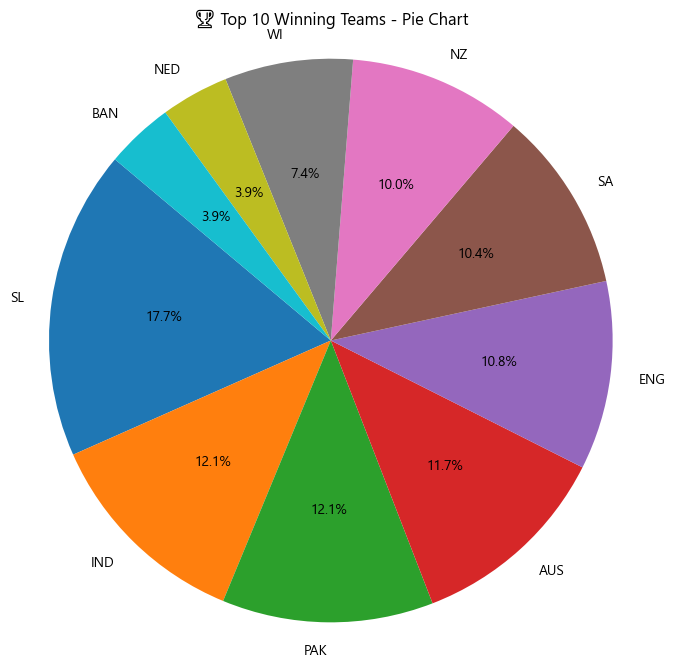

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 🔇 Step 1: Ignore UserWarnings (like emoji font issues)
warnings.filterwarnings("ignore", category=UserWarning)

# 🎨 Step 2: Set font that supports emojis (only works on Windows)
plt.rcParams['font.family'] = 'Segoe UI Emoji'  # or use "Arial Unicode MS" on Mac

# 📊 Step 3: Fill missing 'Winner' values with mode
winner_mode = df['Winner'].mode()[0]
df['Winner'] = df['Winner'].fillna(winner_mode)

# 🔢 Step 4: Count unique winners
print("🔢 Number of Unique Winners:", df['Winner'].nunique())

# 🏆 Step 5: Top 10 winning teams
top_winners = df['Winner'].value_counts().head(10)
print("\n🎯 Top Winning Teams:\n", top_winners)

# 🥧 Step 6: Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_winners, labels=top_winners.index, autopct='%1.1f%%', startangle=140)
plt.title("🏆 Top 10 Winning Teams - Pie Chart")
plt.axis('equal')  # Make the pie a perfect circle
plt.show()



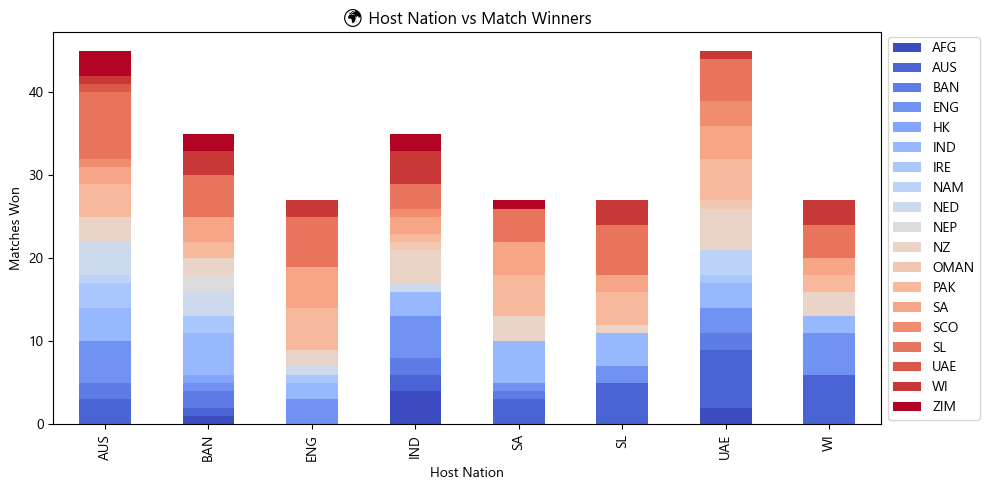

In [13]:
host_win = pd.crosstab(df['Host Nation'], df['Winner'])

host_win.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title("🌍 Host Nation vs Match Winners")
plt.xlabel("Host Nation")
plt.ylabel("Matches Won")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


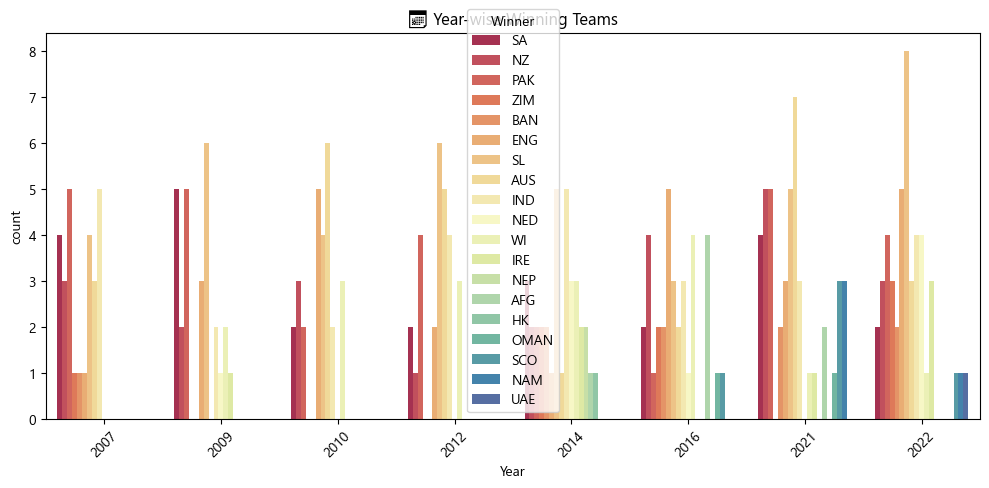

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', hue='Winner', palette='Spectral')
plt.title("📅 Year-wise Winning Teams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


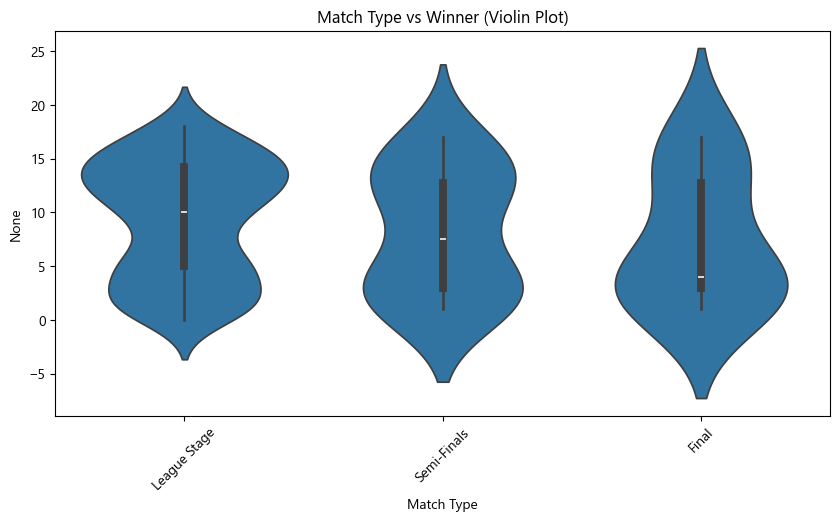

In [16]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Match Type', y=df['Winner'].astype('category').cat.codes)
plt.title("Match Type vs Winner (Violin Plot)")
plt.xticks(rotation=45)
plt.show()


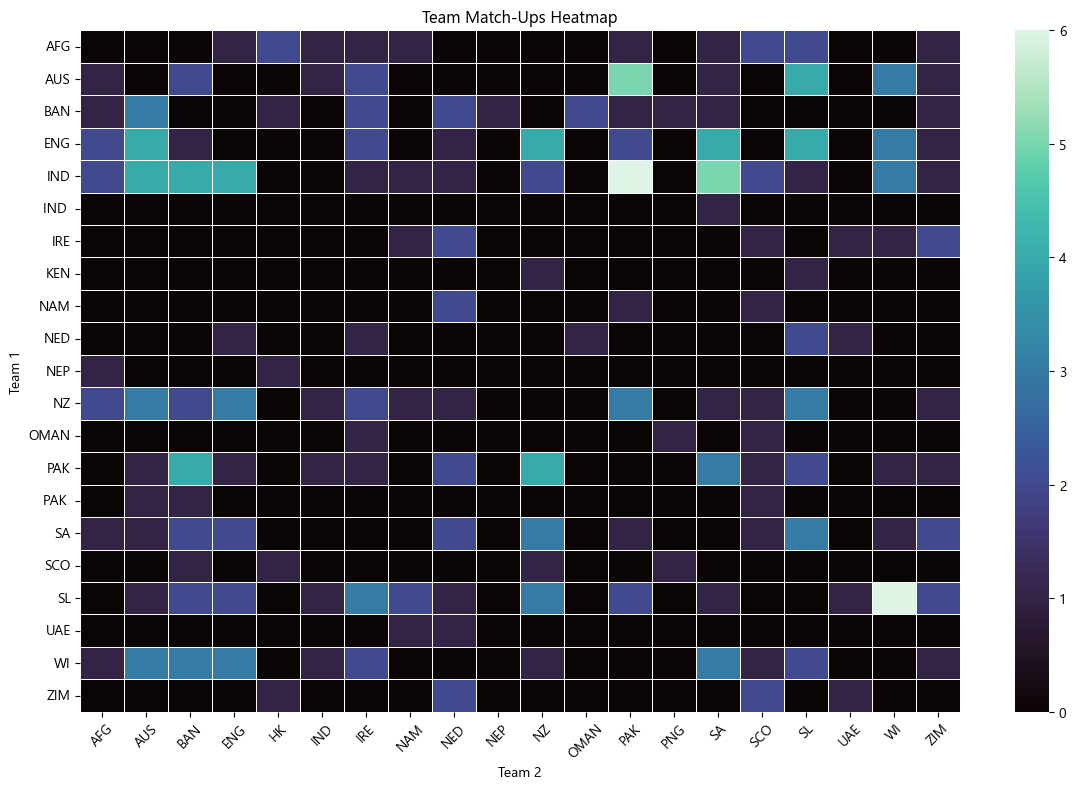

In [24]:
team_matrix = pd.crosstab(df['Team 1'], df['Team 2'])

plt.figure(figsize=(12, 8))
sns.heatmap(team_matrix, cmap='mako', linewidths=0.5)
plt.title("Team Match-Ups Heatmap")
plt.xlabel("Team 2")
plt.ylabel("Team 1")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


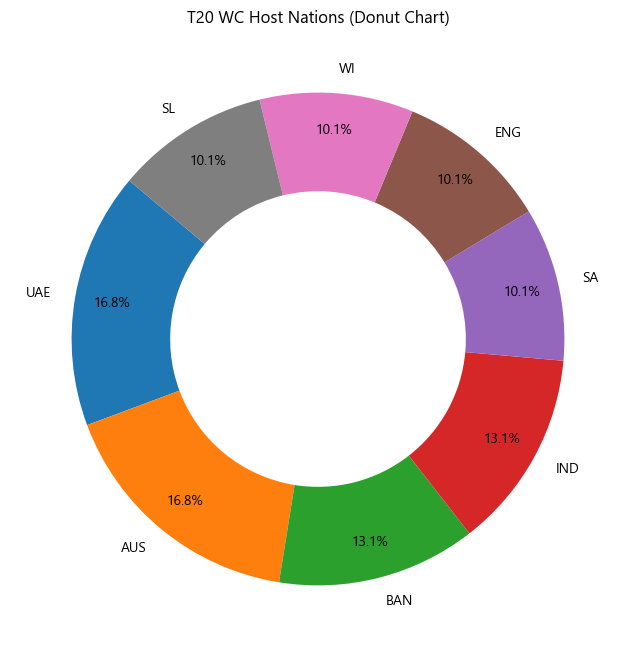

In [27]:
host_counts = df['Host Nation'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(host_counts, labels=host_counts.index, startangle=140,
        autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title("T20 WC Host Nations (Donut Chart)")
plt.show()


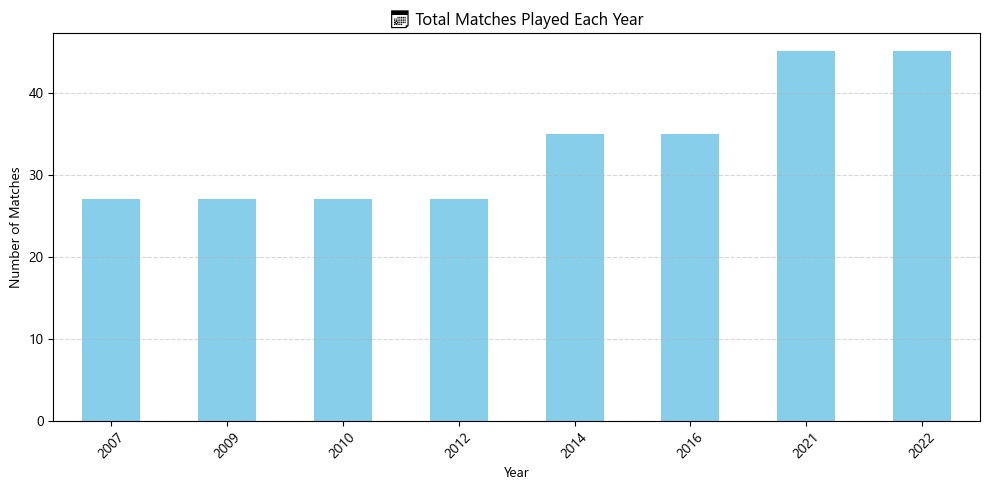

In [30]:
plt.figure(figsize=(10, 5))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("📅 Total Matches Played Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


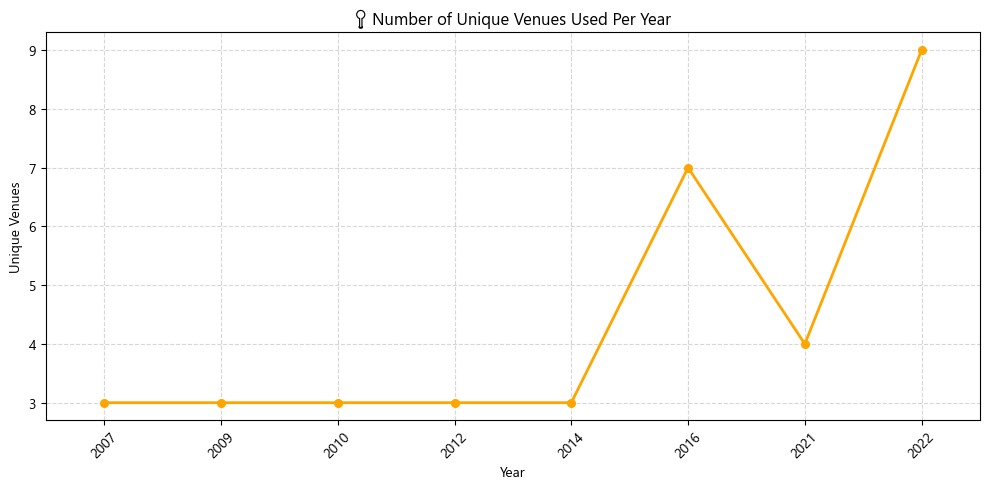

In [31]:
venue_diversity = df.groupby('Year')['Venue'].nunique().reset_index()

plt.figure(figsize=(10, 5))
sns.pointplot(data=venue_diversity, x='Year', y='Venue', color='orange', linewidth=2, marker='o')
plt.title("📍 Number of Unique Venues Used Per Year")
plt.xlabel("Year")
plt.ylabel("Unique Venues")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


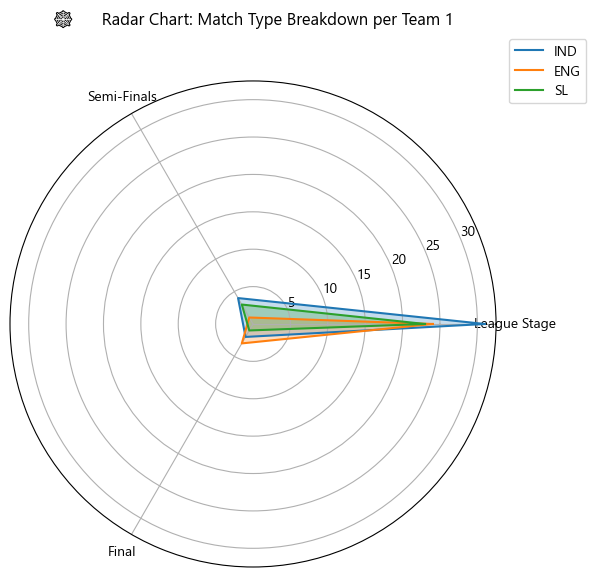

In [32]:
import numpy as np

# 🔍 Top 3 frequent Team 1
top_teams = df['Team 1'].value_counts().head(3).index.tolist()
match_types = df['Match Type'].unique().tolist()

# Prepare radar chart data
radar_data = []
for team in top_teams:
    counts = []
    for mtype in match_types:
        count = df[(df['Team 1'] == team) & (df['Match Type'] == mtype)].shape[0]
        counts.append(count)
    radar_data.append(counts)

# Radar chart function
def plot_radar(data, teams, labels):
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    
    for i, d in enumerate(data):
        d += d[:1]
        ax.plot(angles, d, label=teams[i])
        ax.fill(angles, d, alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title("🕸️ Radar Chart: Match Type Breakdown per Team 1", y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()

# Plot it
plot_radar(radar_data, top_teams, match_types)


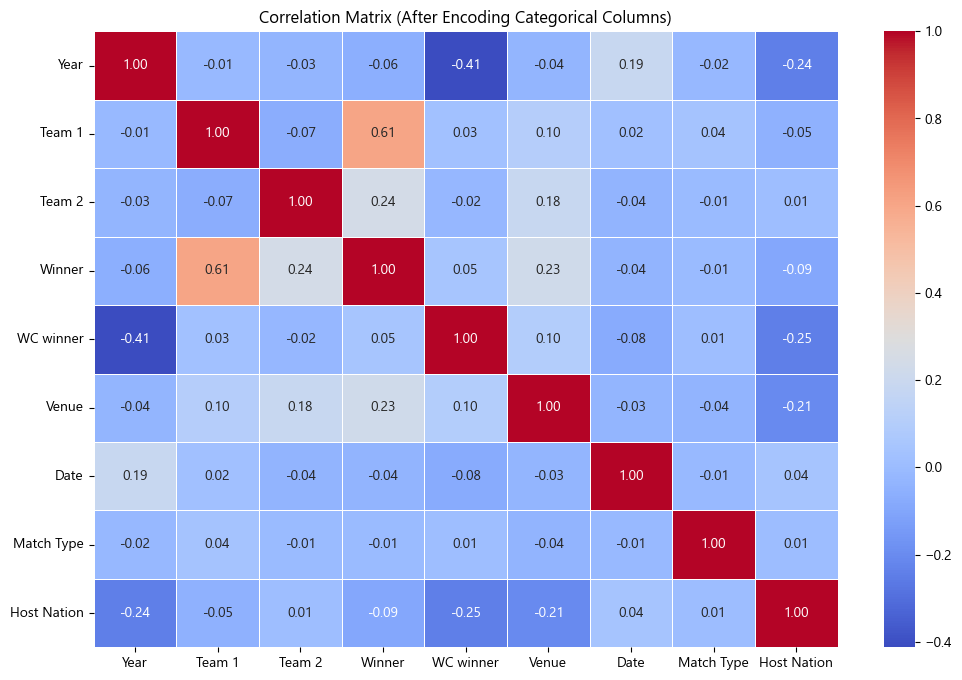

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Create a copy of the original dataframe
encoded_df = df.copy()

# Step 2: Encode all object (categorical) columns
label_encoders = {}
for column in encoded_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column].astype(str))
    label_encoders[column] = le  # optional, if you want to decode later

# Step 3: Compute correlation matrix
correlation_matrix = encoded_df.corr()

# Step 4: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (After Encoding Categorical Columns)")
plt.show()


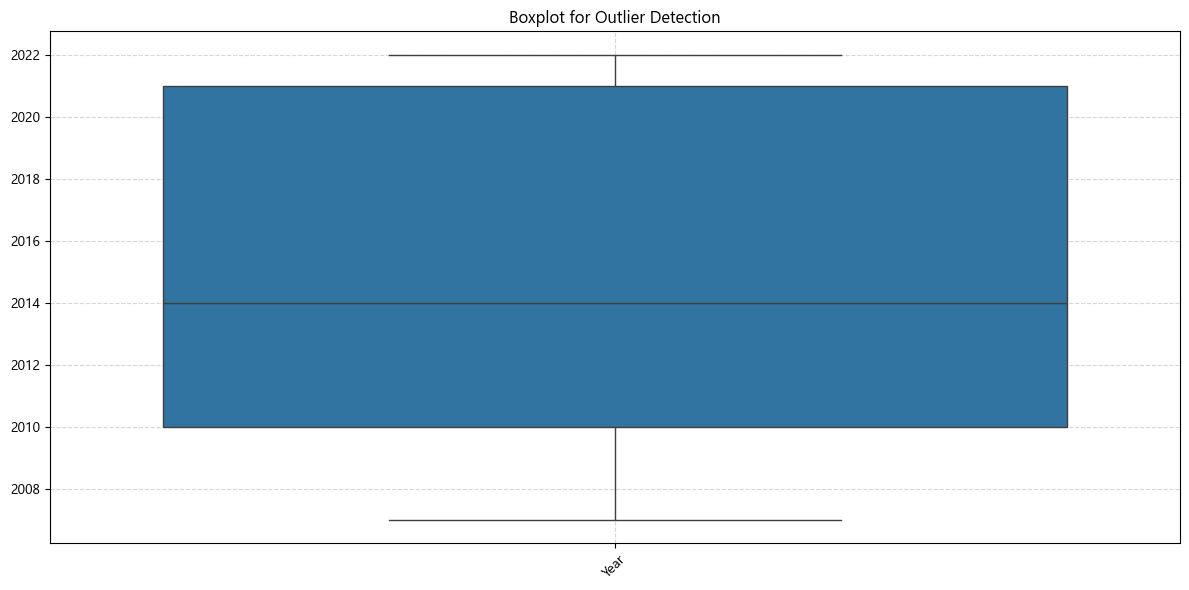

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Step 1: Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# 📦 Step 2: Boxplots for all numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\lenovo l490\AppData\Local\Temp\ipykernel_16260\1030067554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='WC winner', order=df['WC winner'].value_counts().index, palette='cool')


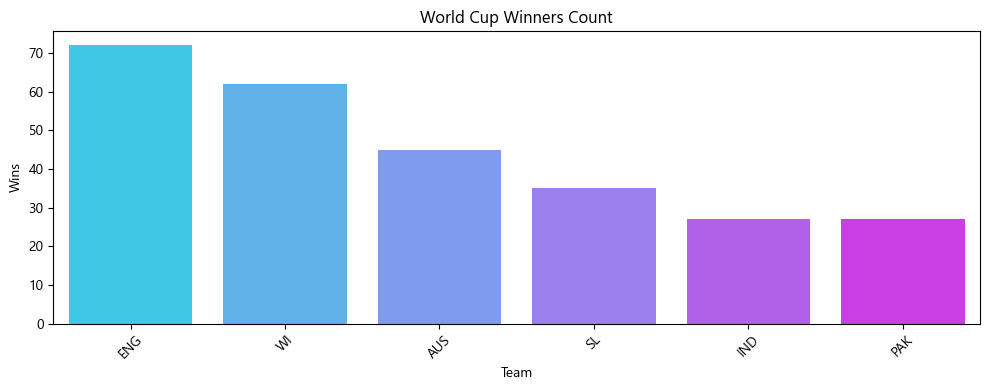

In [37]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='WC winner', order=df['WC winner'].value_counts().index, palette='cool')
plt.title('World Cup Winners Count')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
